In [1]:
%matplotlib inline

In [71]:
def co_line_flux(obj='BHR71', indir='/Users/yaolun/bhr71/fitting/', plotdir='/Users/yaolun/test/'):
    import numpy as np
    import matplotlib.pyplot as plt
    import astropy as apy
    
    def read_fitting_co(filepath,noiselevel):
        from astropy.io import ascii
        co_label = []
        upper_level = 48
        lower_level = 4
        for level in range(0,upper_level-lower_level):
            co_label.append('CO'+str(lower_level+level)+'-'+str(lower_level+level-1))
        data = ascii.read(filepath)
        # data = np.genfromtxt(home+filepath, skip_header=1, dtype=str)
        # header = data[0]
        # data = data[1:,:]
        header = data.colnames
        data = data[(data['SNR']>noiselevel) & (data['Validity']!=0) & (data['Str(W/cm2)']>0)]
        #data = data.astype(float)

        ind_co = []
        for i in range(0, len(data['Line'])):
            if data['Line'][i] in co_label:
                #wl, wl_sig, flux, flux_sig, E_u, A, g
                ind_co.append(i)
        co_data = data[ind_co]
        return co_data, co_data['Line']
     
    # read line fitting result from PACS and SPIRE fitting result
    # PACS
    filepath = indir+obj+'/pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_lines.txt'
    noiselevel = 3
    co_pacs, co_name_pacs = read_fitting_co(filepath, noiselevel)
    # SPIRE
    filepath = indir+obj+'/spire/advanced_products/'+obj+'_spire_corrected_lines.txt'
    noiselevel = 3
    co_spire, co_name_spire = read_fitting_co(filepath, noiselevel)

    co_data = apy.table.vstack((co_pacs, co_spire))
    co_name = np.hstack((co_name_pacs.data, co_name_spire.data))
    
    # Sort the data by wavelength
    co_name = co_name[np.argsort(co_data['ObsWL(um)'])]
    co_data = co_data[np.argsort(co_data['ObsWL(um)'])]

    # acquire J_up array from the CO line names
    j_up = []
    for name in co_name:
        j_up.append(int(name.split('CO')[1].split('-')[0]))
    
    # Make the plot!
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    # convert the unit to W/m2
    ax.plot(j_up, co_data['Str(W/cm2)']*1e4, 'o', mec='None')
    ax.errorbar(j_up, co_data['Str(W/cm2)']*1e4,\
                yerr=co_data['Sig_str(W/cm2)']*1e4, linestyle='None', color='b')
    # for directly comparison to Visser 2012
    ax.set_yscale('log')
    
    ax.set_xlabel(r'$\it{J}_{\rm up}$',fontsize=20)
    ax.set_ylabel(r'$\it{F}_{\rm line}\rm{\,[W\,m^{-2}]}$',fontsize=20)
    [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
    ax.minorticks_on()
    ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
    ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)
    ax.set_xlim([0,46])
    
    fig.savefig(plotdir+obj+'_co_flux.pdf', format='pdf', dpi=300, bbox_inches='tight')


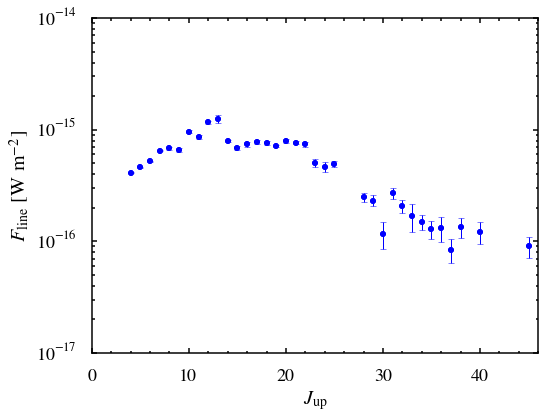

In [72]:
co_line_flux()